--- Dataset Head ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  

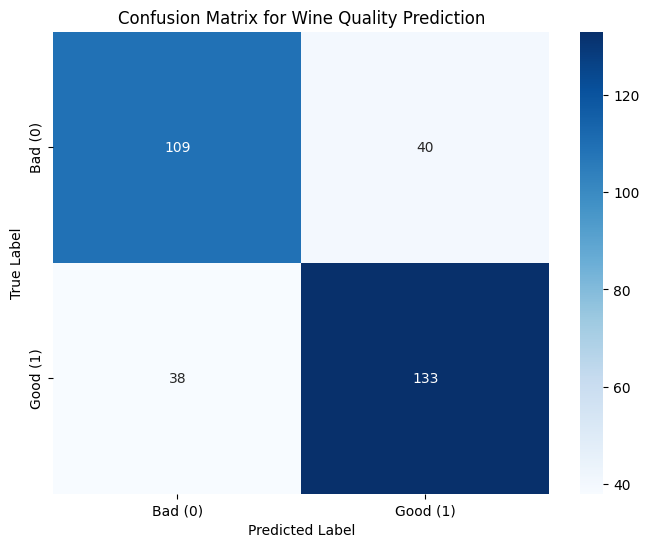

In [10]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 2. Load the dataset
# We use the red wine quality dataset from the UCI repository.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

print("--- Dataset Head ---")
print(df.head())
print("\n--- Dataset Info ---")
df.info()

# 3. Data Preprocessing
# Convert the multi-class 'quality' score into a binary classification problem.
# We'll label wine with a quality score of 6 or higher as 'good' (1) and below 6 as 'bad' (0).
df['quality_label'] = df['quality'].apply(lambda value: 1 if value >= 6 else 0)

# Define features (X) and the target (y)
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

# Normalize the features, as they are on different scales.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split the data into training and testing sets
# We'll use 80% for training and 20% for testing.
# 'stratify=y' ensures the proportion of good/bad wine is the same in both train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# 5. Train the Decision Tree Classifier
# Initialize the model with a fixed random_state for reproducibility.
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data.
model.fit(X_train, y_train)
print("\nModel training complete.")

# 6. Evaluate the Model
# Make predictions on the unseen test data.
y_pred = model.predict(X_test)

# Calculate the accuracy of the model.
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Generate and visualize the confusion matrix to see the model's performance in detail.
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bad (0)', 'Good (1)'],
            yticklabels=['Bad (0)', 'Good (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Wine Quality Prediction')
plt.savefig('wine.quality.png')
plt.show()